In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
#Adding additional libraries for the analysis
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [3]:
#Reading the databse in the memory 
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv', index_col = 0)
print(df.head())

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [4]:
print (df.dtypes)
print(df.shape)

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object
(300153, 11)


In [5]:
print(df.isnull().sum())

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [6]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Looking at the correlation data, it appears that there is a strong correlation between the following: 
- Price and Class
- Stops and Duration
- Price and Duration
- Airline and Class (likely no business class data/ flights in one or more of the airlines)

There is a somewhat weak correlation between 
- Price and Airline 
- Price and Stops 

In addition, it appears that there is a negative correlation between price and days booked in advance 

Lets investigate the correlation between airline and price first

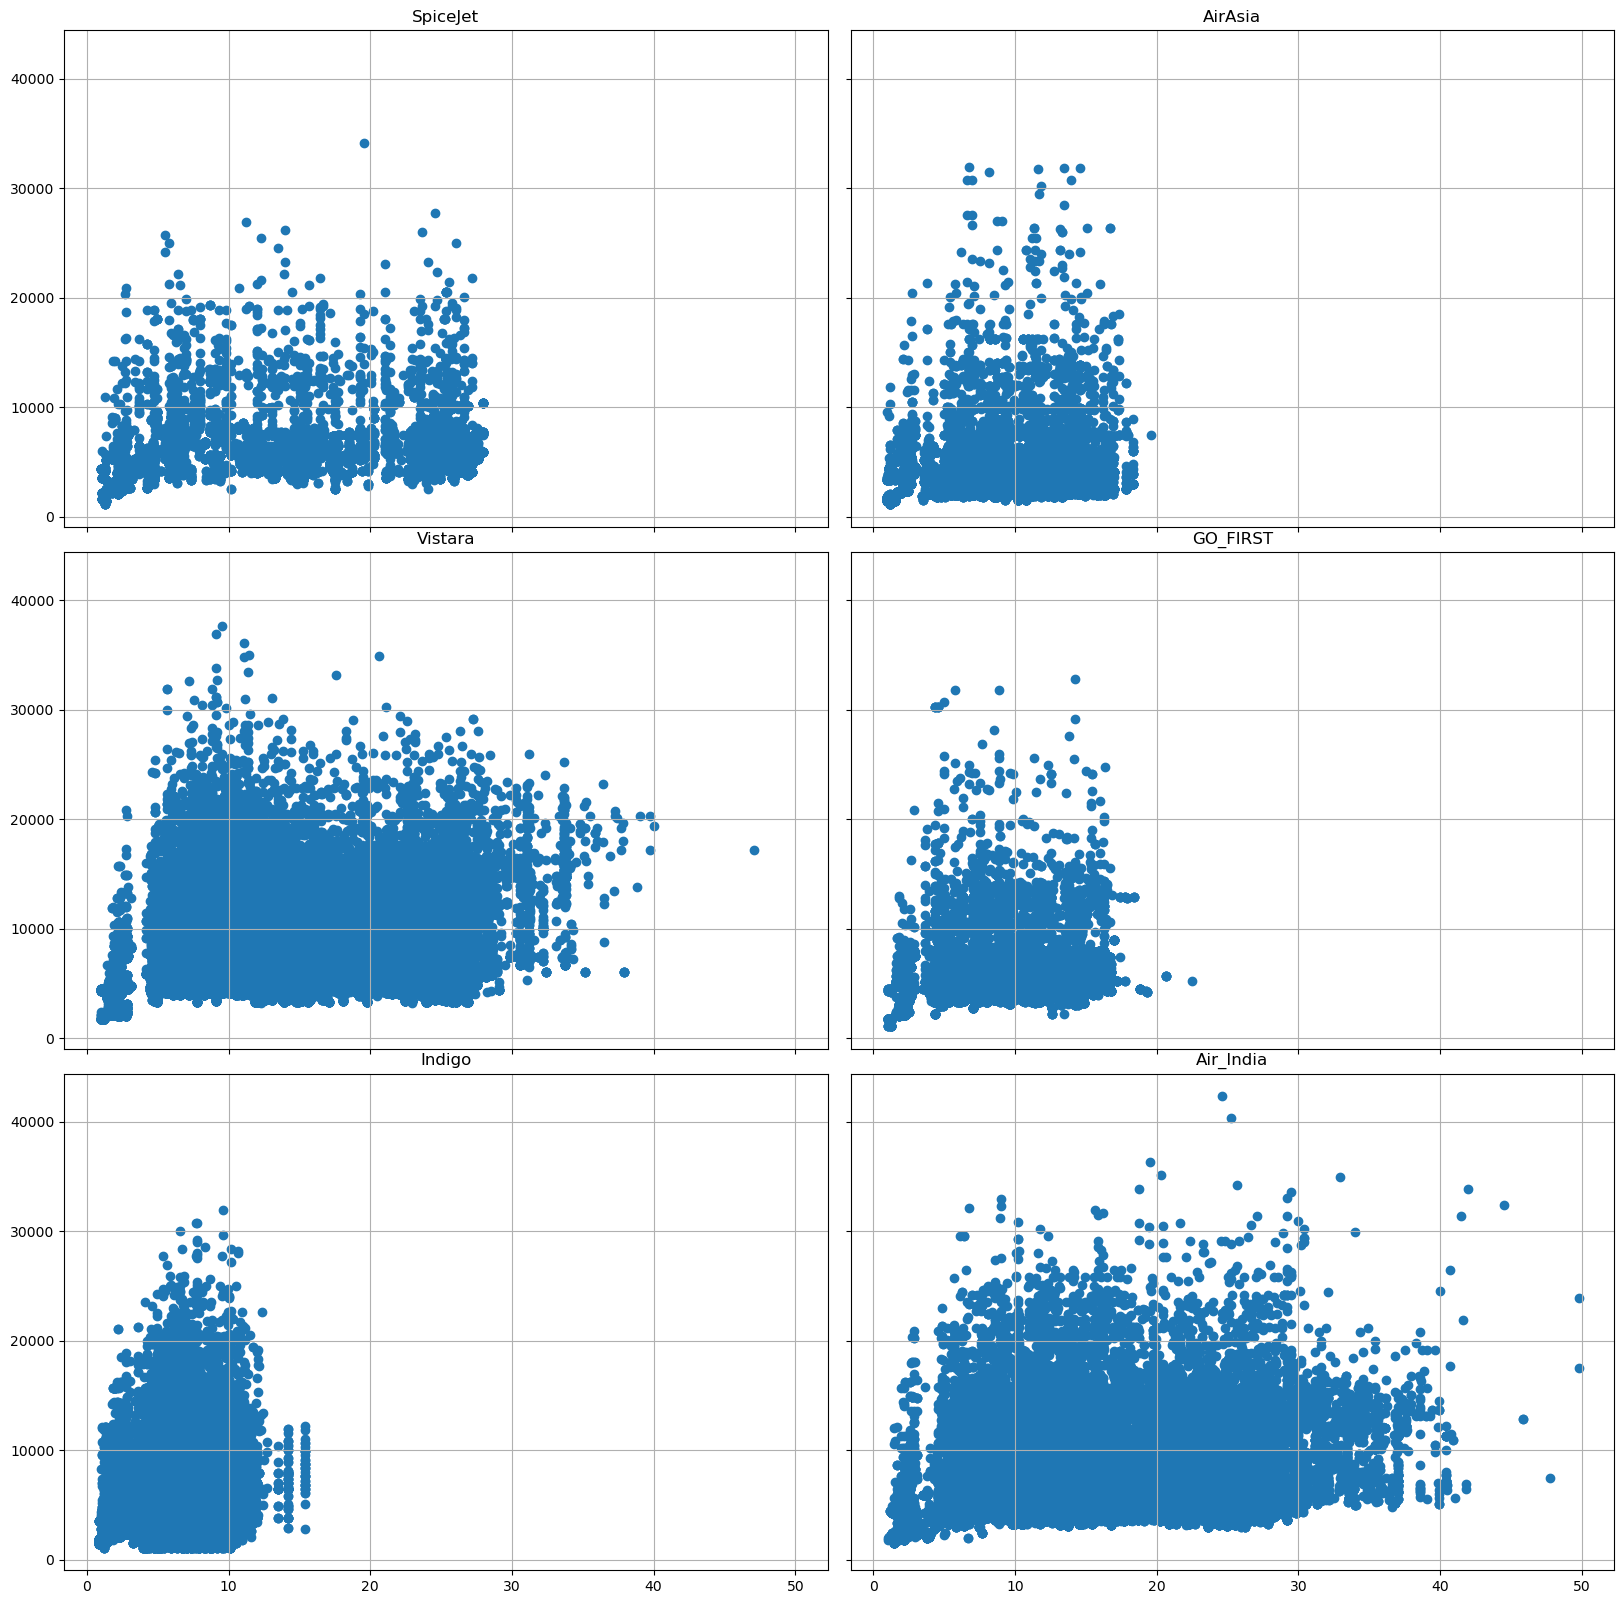

In [7]:
# Create scatter plot for all economy flights
plot_df = df[df['class']=='Economy']
airline = df['airline'].unique()

# Create two subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20), sharex=True, sharey=True)
airline_counter = 0

for row_count in range(3): 
    for col_count in range(2):
        plot_dff = plot_df[plot_df['airline']== airline[airline_counter]]
        axs[row_count, col_count].scatter(plot_dff['duration'], plot_dff['price'])
        axs[row_count, col_count].set_title(airline[airline_counter])
        axs[row_count, col_count].grid(True)
        airline_counter += 1
    
plt.subplots_adjust(wspace=0.03, hspace=0.05)


# Show plot
plt.show()

From the analysis above, it appears that Spicejet and AirAsia are the cheaper carriers with the latter mainly focusing on shorthall flights. Moreover, Indigo seems to the most expensive carrier for the same duration of the flight, however it mainly specialises in short term flights as well. 

Indigo and Vistra are long-haul carriers that are also more premium. 

The next 2 parameters that can impact the flight prices are the time that flight arrives/ leaves and also the city that it comes from/ goes to. We will investigate these relationships in the next section

In [8]:
airline = df['airline'].unique()
print (airline[0])

SpiceJet
